# Анализ винного рынка 

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('winemag-data_first150k.csv')

### Отбросим ненужные столбцы

In [21]:
df2 = df.drop(['Unnamed: 0', 'description', 'region_1', 'region_2'], axis = 1)

In [23]:
df2.head(10)

,country,designation,points,price,province,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,96,90.0,California,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Pinot Noir,Ponzi
4,France,La Brûlade,95,66.0,Provence,Provence red blend,Domaine de la Bégude
5,Spain,Numanthia,95,73.0,Northern Spain,Tinta de Toro,Numanthia
6,Spain,San Román,95,65.0,Northern Spain,Tinta de Toro,Maurodos
7,Spain,Carodorum Único Crianza,95,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez
8,US,Silice,95,65.0,Oregon,Pinot Noir,Bergström
9,US,Gap's Crown Vineyard,95,60.0,California,Pinot Noir,Blue Farm


In [25]:
df2.shape

(150930, 7)

### Очистим данные, уберем вина, не имеющие наименований

In [28]:
nan_df2 = df2[df2.isna().any(axis=1)]
display(nan_df2.head(10))
df2['designation'] = df2['designation'].fillna('None')


,country,designation,points,price,province,variety,winery
32,Italy,Vigna Piaggia,90,NaN,Tuscany,Sangiovese,Abbadia Ardenga
36,France,NaN,90,60.0,Rhône Valley,Rhône-style White Blend,Clos de L'Oratoire des Papes
37,Italy,NaN,90,29.0,Tuscany,Sangiovese,Avignonesi
38,Italy,NaN,90,23.0,Tuscany,Sangiovese,Casina di Cornia
48,Italy,NaN,90,50.0,Tuscany,Sangiovese,Brunelli Martoccia
49,US,NaN,90,40.0,Washington,Cabernet Sauvignon,Canvasback
51,France,NaN,90,68.0,Burgundy,Chardonnay,Chartron et Trébuchet
54,US,NaN,90,18.0,California,Chardonnay,De Loach
56,France,Le Pavé,90,NaN,Loire Valley,Sauvignon Blanc,Domaine Vacheron
61,Australia,NaN,91,36.0,Victoria,Pinot Noir,Moorooduc


In [30]:
nan_df2 = df2[df2.isna().any(axis=1)]
display(nan_df2.head(10))
nan_df2.shape

,country,designation,points,price,province,variety,winery
32,Italy,Vigna Piaggia,90,NaN,Tuscany,Sangiovese,Abbadia Ardenga
56,France,Le Pavé,90,NaN,Loire Valley,Sauvignon Blanc,Domaine Vacheron
72,Italy,Bussia Riserva,91,NaN,Piedmont,Nebbiolo,Silvano Bolmida
82,Italy,Palliano Riserva,91,NaN,Piedmont,Nebbiolo,Ceste
116,Spain,Dulce Tinto,86,NaN,Levante,Monastrell,Casa de la Ermita
242,France,None,88,NaN,Bordeaux,Bordeaux-style White Blend,Château Ferran
261,France,Noctambule,88,NaN,Loire Valley,Chenin Blanc-Chardonnay,Musset-Roullier
282,France,None,92,NaN,Southwest France,Malbec,Château du Cèdre
294,France,Cami Salié,91,NaN,Southwest France,Gros and Petit Manseng,Lionel Osmin & Cie
323,Spain,Prestigio Pago de las Solanas,94,NaN,Northern Spain,Red Blend,Matarromera


(13700, 7)

### Отбросим строки без значений цены/баллов

In [33]:
df2.dropna(inplace=True)
df2.drop_duplicates(inplace=True)

In [35]:
df2.shape

(86226, 7)

In [37]:
df2.head()

,country,designation,points,price,province,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Cabernet Sauvignon,Heitz
1,Spain,Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Special Selected Late Harvest,96,90.0,California,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Pinot Noir,Ponzi
4,France,La Brûlade,95,66.0,Provence,Provence red blend,Domaine de la Bégude


# Анализ данных

### 1. Анализ качества вина


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='points', ylabel='Count'>

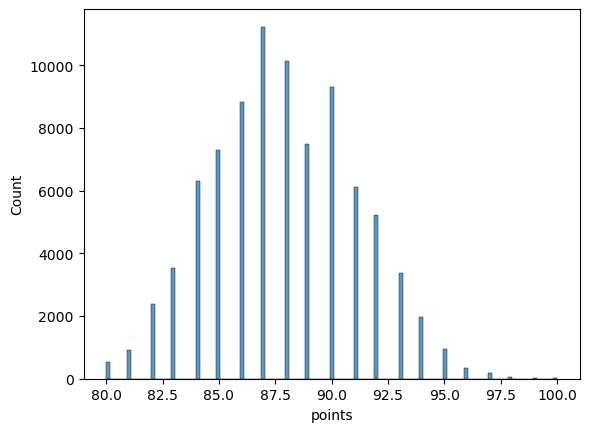

In [41]:
sns.histplot(data=df2, x="points")

#### Вывод: большинство вин в оценке качества получили оценку 85-90 баллов

### 2. Отношение цены и качества


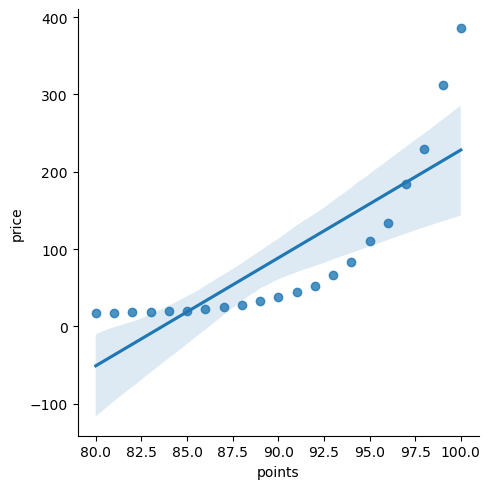

In [45]:
df3= df2.groupby('points')['price'].mean().reset_index()

sns.lmplot(data=df3, x="points", y="price", legend = "full")

#### Вывод: Стоимость вин, получивших оценку выше 92.5 баллов значительно возрастает.

### 3. Анализ по регионам производства вина


In [65]:
df2.groupby('province')['price'].agg(['mean', 'count']).query('count > 30').sort_values('mean', ascending = False).head(10)

,mean,count
province,,
Champagne,84.062069,725
Tokaji,77.239130,46
Rheingau,70.693277,238
Burgundy,70.650206,2187
Port,59.571096,429
Baden,54.297872,47
Nahe,49.440000,50
Piedmont,49.243613,1683
Wachau,48.194313,211


In [67]:
df2.groupby('province')['points'].agg(['mean', 'count']).query('count > 30').sort_values('mean', ascending = False).head(10)

,mean,count
province,,
Wachau,90.696682,211
Kamptal,90.544379,169
Champagne,90.131034,725
Tokaji,89.826087,46
Burgundy,89.587563,2187
Kremstal,89.560510,157
Mosel,89.554140,471
Rheingau,89.508403,238
Carnuntum,89.400000,40


#### Вывод: представленные вина имеют наибольшую среднюю стоимость или оценку 

### 4. Анализ сортов вина


In [84]:
#Most common varieties
top_10 = df2['variety'].value_counts().head(10).reset_index()
top_10

,variety,count
0,Pinot Noir,8485
1,Chardonnay,8339
2,Cabernet Sauvignon,7839
3,Red Blend,5908
4,Sauvignon Blanc,3727
5,Syrah,3460
6,Riesling,3282
7,Bordeaux-style Red Blend,3181
8,Merlot,2992
9,Zinfandel,2336


In [86]:
top_10_varieties_list = top_10['variety'].tolist()  
filtered_df = df2[df2['variety'].isin(top_10_varieties_list)]

mean_values = filtered_df.groupby('variety').agg({
    'points': 'mean',
    'price': 'mean'
}).reset_index()

top_10 = pd.merge(top_10, mean_values, on='variety')
top_10

,variety,count,points,price
0,Pinot Noir,8485,88.791632,44.790925
1,Chardonnay,8339,87.708838,32.636767
2,Cabernet Sauvignon,7839,88.148743,43.158566
3,Red Blend,5908,88.020481,35.596479
4,Sauvignon Blanc,3727,86.817011,18.809498
5,Syrah,3460,88.389306,35.696243
6,Riesling,3282,88.621877,31.099939
7,Bordeaux-style Red Blend,3181,88.895945,51.103427
8,Merlot,2992,86.468249,27.282086
9,Zinfandel,2336,86.751284,27.200771


<Axes: xlabel='variety', ylabel='price'>

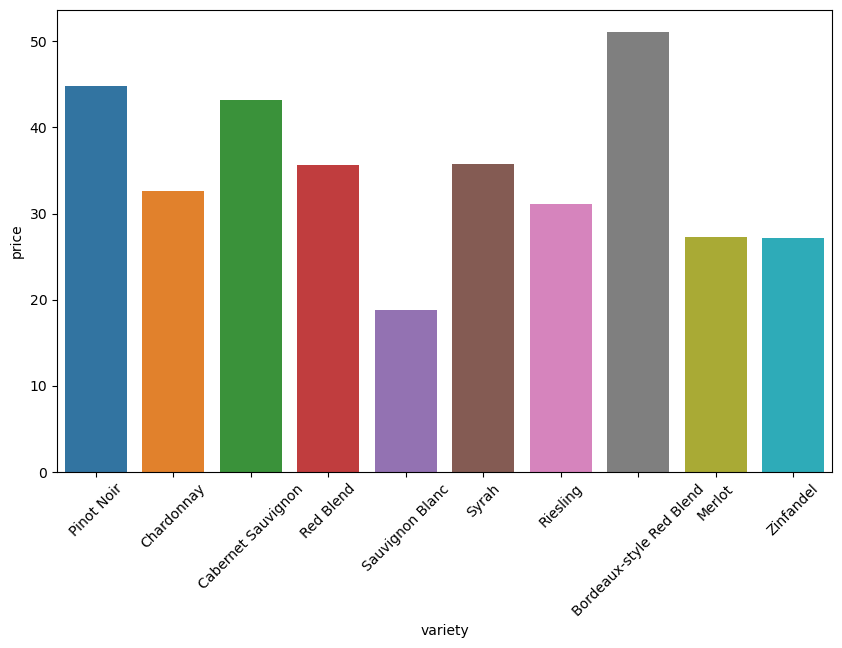

In [88]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)

sns.barplot(top_10, x="variety", y="price")

#### Вывод: представленные выше сорта вина получили наибольшее количество оценок экспертов, что говорит об их популярности на винном рынке

### 5. Успешность виноделен


In [410]:
top_winery = (
    df2.groupby('winery')['points']
    .agg(['mean', 'count'])  
    .query('count > 30')     
    .sort_values('mean', ascending=False)  
    .head(10)  
)

In [412]:
lux_winery = (
    df2.groupby('winery')['price']
    .agg(['mean', 'count'])  
    .query('count > 30')     
    .sort_values('mean', ascending=False)  
    .head(10)  
)


In [416]:
best = pd.merge(top_winery, lux_winery, on='winery', how='inner')
best = best.drop(['count_x', 'count_y'], axis = 1)
best = best.rename(columns = {'mean_x' : 'avg_points', 
                            'mean_y' : 'avg_price'
                           })
best

,avg_points,avg_price
winery,,
Domaine Leflaive,93.806452,226.774194
Marchesi Antinori,92.593750,104.593750
Louis Jadot,92.418919,94.635135


#### Вывод: винодельни Domaine Leflaive, 
Marchesi Antinoi и 
Louis Jad производят дорогие вина, получающие высокие оценки критиков.ot

### 6. Распределение цен


In [308]:
#Finding the biggest and the smallest prices 
df2['price'].max()

2300.0

In [78]:
df2['price'].min()

4.0

In [345]:
bins = [0, 25, 80, 2350]  # 0-25, 25-80, >80
labels = ['value', 'premium', 'luxury']
df2['price category'] = pd.cut(df['price'], bins=bins, labels=labels)
df2[['price', 'price category']].head(15)


,price,price category
0,235.0,luxury
1,110.0,luxury
2,90.0,luxury
3,65.0,premium
4,66.0,premium
5,73.0,premium
6,65.0,premium
7,110.0,luxury
8,65.0,premium
9,60.0,premium


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price category', ylabel='Count'>

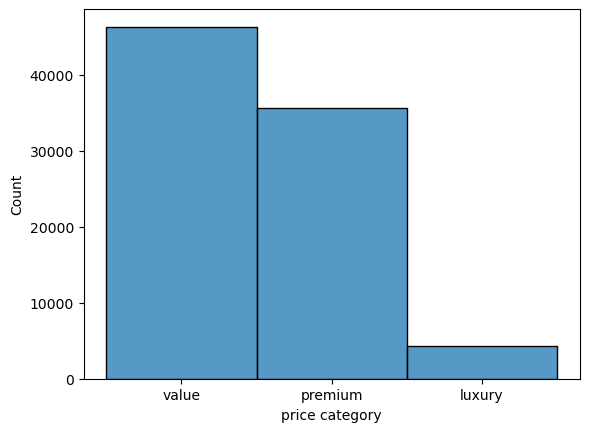

In [377]:
sns.histplot(data = df2, x = 'price category')

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


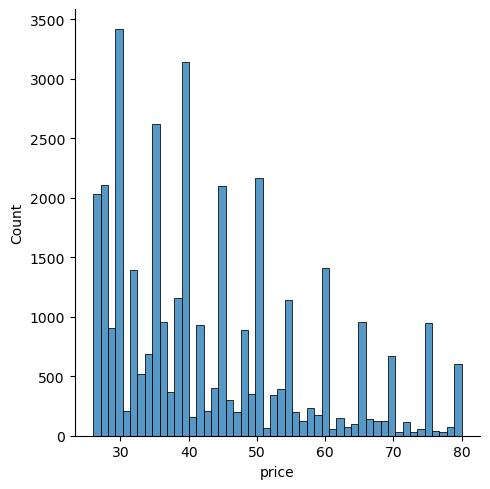

In [388]:
sns.displot(df2[df2['price category'] == 'premium']['price']) 

### 7. Лучшие вина по цене и качеству


In [418]:
top_quality = (
    df2.groupby('designation')['points']
    .agg(['mean', 'count'])  
    .query('count > 30')     
    .sort_values('mean', ascending=False)  
    .head(30)  
)


In [420]:
lowest_price = (
    df2.groupby('designation')['price']
    .agg(['mean', 'count'])  
    .query('count > 30')     
    .sort_values('mean', ascending=True)  
    .head(30)  
)


In [422]:
intersection = pd.merge(top_quality, lowest_price, on='designation', how='inner')
intersection = intersection.drop(['count_x', 'count_y'], axis = 1)
intersection = intersection.rename(columns = {'mean_x' : 'avg_points', 
                            'mean_y' : 'avg_price'
                           })
intersection

,avg_points,avg_price
designation,,
Late Bottled Vintage,88.552239,25.253731
Cuvée Prestige,88.222222,25.044444
Rosé of,87.716418,19.313433


#### Вывод: вина Late Bottled Vintage, Cuvée Prestige и Rosé of получают высокие оценки экспертов и имеют низкую стоимость.